
## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
from numpy import math

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning modules
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Module 4/Week 1/Day 6/CAR DETAILS FROM CAR DEKHO.csv")

In [4]:
# loading data from drive
# df = pd.read_csv("E:\\Data Science\\amlabetter\\Module 4\\Week 1\\Day 5\\CAR DETAILS FROM CAR DEKHO.csv")

In [5]:
# First look
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
# Checking rows and columns of the dataset
df.shape

(4340, 8)

In [7]:
# dependent and independent variables
dependent_variable = 'selling_price'
independent_variables = list(set(df.columns.to_list()) - {dependent_variable})
print(f"Dependent variable : {dependent_variable}")
print(f"Independent variable : {independent_variables}")

Dependent variable : selling_price
Independent variable : ['seller_type', 'transmission', 'name', 'km_driven', 'year', 'fuel', 'owner']


In [8]:
# looking for datatype and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [9]:
# checking data distribution and summary
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


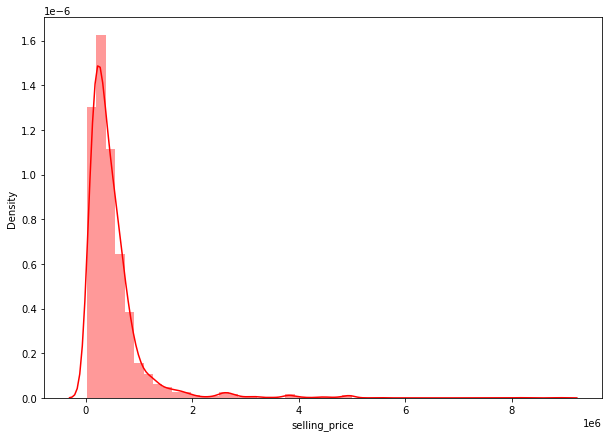

In [10]:
# distribution of dependent variable
plt.rcParams['figure.figsize'] = (10,7)
sns.distplot(df[dependent_variable], color= 'red')

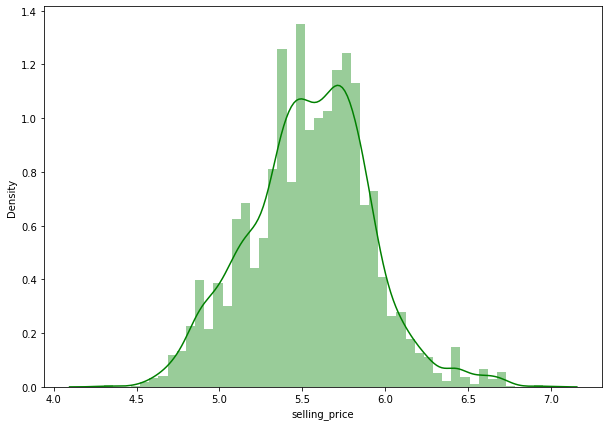

In [11]:
# log transformed view of dependent variable
sns.distplot(np.log10(df[dependent_variable]), color= 'g')

In [12]:
# numeric features
numeric_features = df.describe().columns
print(numeric_features)

Index(['year', 'selling_price', 'km_driven'], dtype='object')


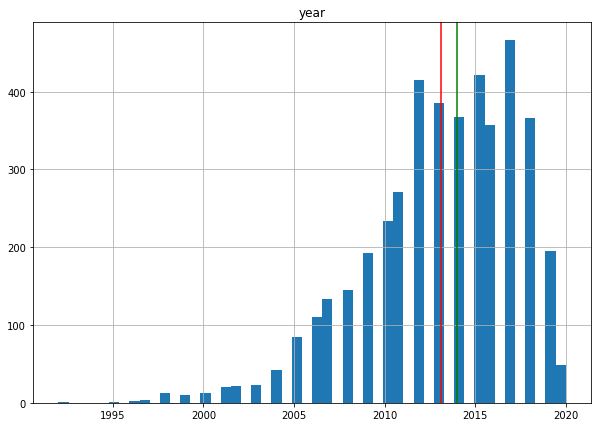

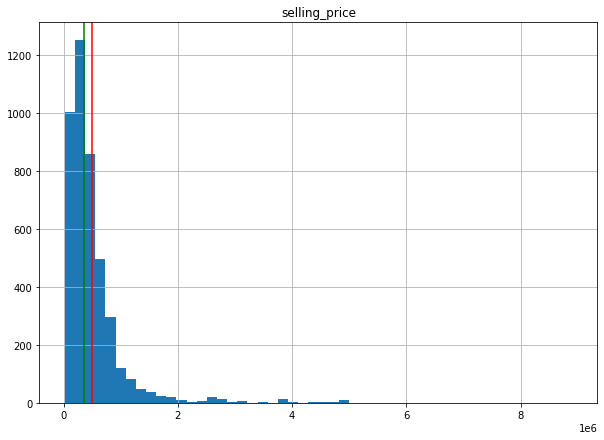

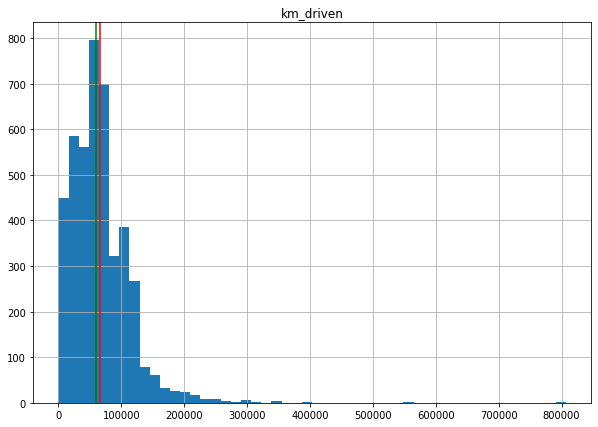

In [13]:
# visual representation of dependent and independent variables
for col in numeric_features:
    ax = plt.figure(figsize=(10,7)).gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.set_title(col)
    ax.axvline(feature.mean(), color = 'red')
    ax.axvline(feature.median(), color = 'green')
plt.show()

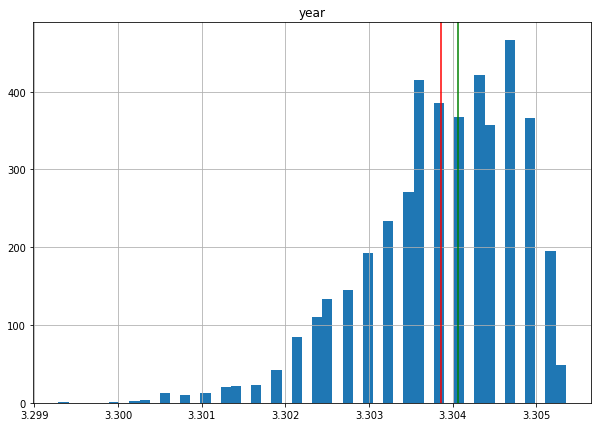

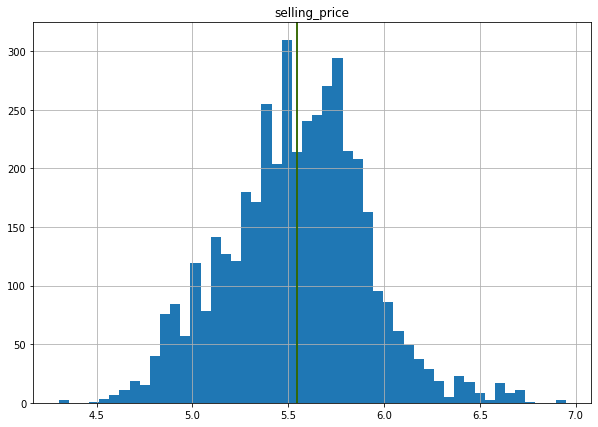

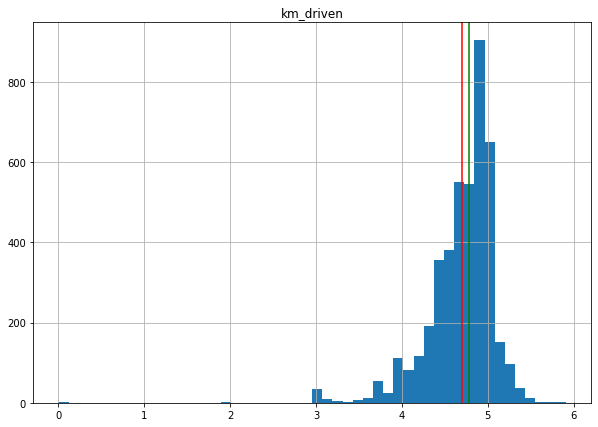

In [14]:
# visual representation of log transformed dependent and independent variables
for col in numeric_features:
    ax = plt.figure(figsize=(10,7)).gca()
    feature = np.log10(df[col])
    feature.hist(bins = 50, ax = ax)
    ax.set_title(col)
    ax.axvline(feature.mean(), color = 'red')
    ax.axvline(feature.median(), color = 'green')
plt.show()

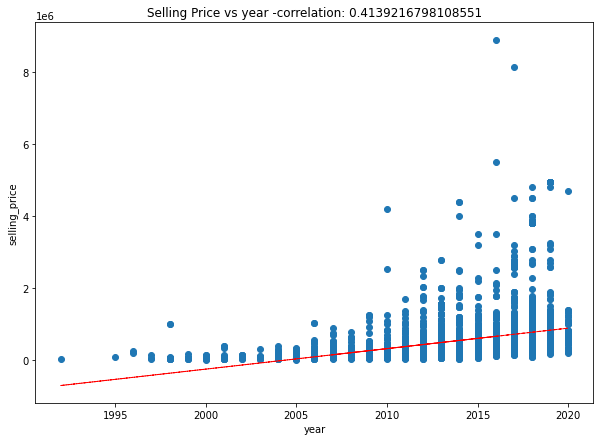

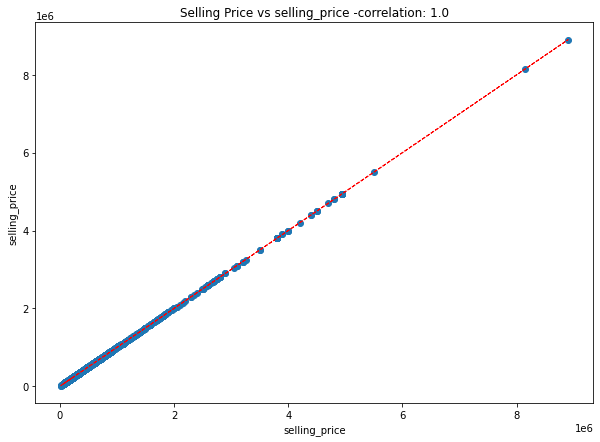

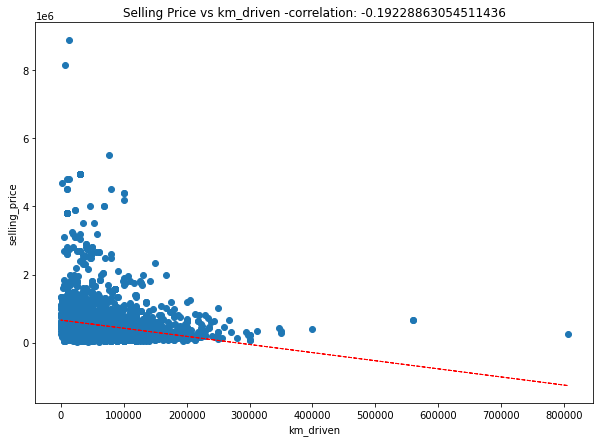

In [15]:
# correlation view of dependent and independent variables
for col in numeric_features:
    ax = plt.figure(figsize=(10,7)).gca()
    feature = df[col]
    label = df[dependent_variable]
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel(dependent_variable)
    ax.set_title('Selling Price vs '+col+' -correlation: '+str(correlation))
    z= np.polyfit(df[col],df[dependent_variable],1)
    y_hat = np.poly1d(z)(df[col])
    plt.plot(df[col],y_hat,"r--", lw = 1)
plt.show()

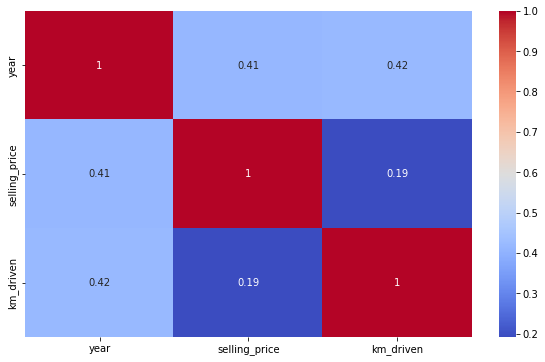

In [16]:
# correllation checking
plt.rcParams['figure.figsize'] = (10,6)
correlation = df.corr()
sns.heatmap(abs(correlation),annot = True, cmap = 'coolwarm')

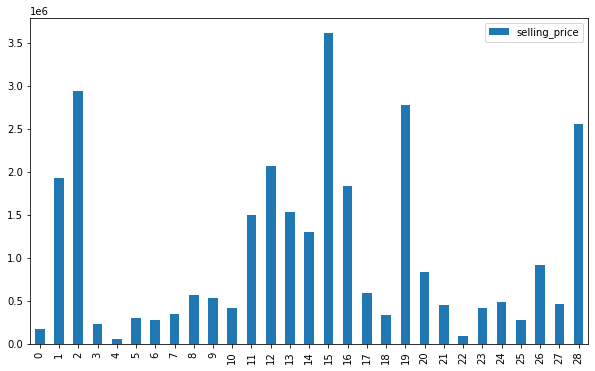

In [17]:
# making new column for car company
df['company'] = df['name'].str.split(" ", expand=True)[0]
companies = df.groupby('company')['selling_price'].mean().reset_index()
companies.plot.bar()

In [18]:
# creating columns high,middle,low : high >= 1800000; 500000>= medium > 1800000 ; low < 500000

# breaking high middle and low companies
df['high'] = df['selling_price'].apply(lambda x : 1 if x >= 1800000 else 0)
df['middle'] = df['selling_price'].apply(lambda x : 1 if x >=500000 and x < 1800000 else 0)
df['low'] = df['selling_price'].apply(lambda x : 1 if x < 500000 else 0)

# breaking fuel column
df['Petrol'] = df['fuel'].apply(lambda x : 1 if x == 'Petrol' else 0)
df['Diesel'] = df['fuel'].apply(lambda x : 1 if x == 'Diesel' else 0)

# breaking owner column
df['First Owner'] = df['owner'].apply(lambda x : 1 if x == 'First Owner' else 0)
df['Second Owner'] = df['owner'].apply(lambda x : 1 if x == 'Second Owner' else 0)
df['Third Owner'] = df['owner'].apply(lambda x : 1 if x == 'Third Owner' else 0)
df['Fourth & Above Owner'] = df['owner'].apply(lambda x : 1 if x == 'Fourth & Above Owner' else 0)
df['Test Drive Car'] = df['owner'].apply(lambda x : 1 if x == 'Test Drive Car' else 0)

# breaking seller_type column
df['Individual'] = df['seller_type'].apply(lambda x : 1 if x == 'Individual' else 0)
df['Dealer'] = df['seller_type'].apply(lambda x : 1 if x == 'Dealer' else 0)
df['Trustmark Dealer'] = df['seller_type'].apply(lambda x : 1 if x == 'Trustmark Dealer' else 0)

# breaking transmission column
df['Manual'] = df['transmission'].apply(lambda x : 1 if x == 'Manual' else 0)
df['Automatic'] = df['transmission'].apply(lambda x : 1 if x == 'Automatic' else 0)

# creating age column
df['age'] = df['year'].apply(lambda x : 2020-x)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company,high,...,Second Owner,Third Owner,Fourth & Above Owner,Test Drive Car,Individual,Dealer,Trustmark Dealer,Manual,Automatic,age
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,0,...,0,0,0,0,1,0,0,1,0,13
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,0,...,0,0,0,0,1,0,0,1,0,13
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,0,...,0,0,0,0,1,0,0,1,0,8
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,0,...,0,0,0,0,1,0,0,1,0,3
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,0,...,1,0,0,0,1,0,0,1,0,6


In [19]:
# variables to be processed in model
X = df[['km_driven','age','high','middle','low','Petrol','Diesel','First Owner','Second Owner','Fourth & Above Owner',
        'Third Owner','Test Drive Car','Individual', 'Dealer','Manual', 'Automatic', 'Trustmark Dealer']].values
y = np.log10(df[dependent_variable].values)
# y = df[dependent_variable].values

print(f"X: "+str(X[0:10]))
print(f"y: "+str(y[0:10]))

X: [[ 70000     13      0      0      1      1      0      1      0      0
       0      0      1      0      1      0      0]
 [ 50000     13      0      0      1      1      0      1      0      0
       0      0      1      0      1      0      0]
 [100000      8      0      1      0      0      1      1      0      0
       0      0      1      0      1      0      0]
 [ 46000      3      0      0      1      1      0      1      0      0
       0      0      1      0      1      0      0]
 [141000      6      0      0      1      0      1      0      1      0
       0      0      1      0      1      0      0]
 [125000     13      0      0      1      1      0      1      0      0
       0      0      1      0      1      0      0]
 [ 25000      4      0      1      0      1      0      1      0      0
       0      0      1      0      1      0      0]
 [ 60000      6      0      0      1      1      0      0      1      0
       0      0      1      0      1      0      0]
 [ 25

In [20]:
# train and test portions
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.2,random_state=0)

## LinearRegression

In [21]:
# fitting linear regression model
reg = LinearRegression().fit(xtrain,ytrain)

In [22]:
# predicting xtrain
train_pred = reg.predict(xtrain)
print(train_pred[:5])

[5.54084172 5.73352822 5.07621698 5.75866133 5.49642133]


In [23]:
# RMSE prediction for train data
np.math.sqrt(mean_squared_error(ytrain,train_pred))

0.15672438674801717

In [24]:
# test prediction
test_pred = reg.predict(xtest)
print(test_pred[:10])

[5.62695312 5.96803476 5.35138054 6.60810947 5.31687843 5.24462501
 5.63780966 5.39671975 6.03432206 5.49960899]


In [25]:
# RMSE prediction for test data
np.math.sqrt(mean_squared_error(ytest,test_pred))

0.1561208573557193

## Lasso Regression

In [26]:
# importing lasso
from sklearn.linear_model import Lasso

In [27]:
# training model
lasso = Lasso(alpha=0.001, max_iter=3000)
lasso.fit(xtrain,ytrain)
lasso.score(xtrain,ytrain)

0.8124334783101994

In [28]:

# train prediction
lasso_train_pred = lasso.predict(xtrain)
print(lasso_train_pred[:5])

[5.54110124 5.72950938 5.07170022 5.76251854 5.49661926]


In [29]:
# RMSE of train prediction
np.math.sqrt(mean_squared_error(ytrain,lasso_train_pred))

0.15708323779133493

In [30]:
# test prediction
lasso_test_pred = lasso.predict(xtest)
print(lasso_test_pred[:5])

[5.62231426 5.96194597 5.36953554 6.5693467  5.31128329]


In [31]:
# RMSE of test prediction
np.math.sqrt(mean_squared_error(ytest,lasso_test_pred))

0.15664293420331396

##  Ridge Regression

In [32]:
# importing lasso
from sklearn.linear_model import Ridge

In [33]:
# training model
ridge = Ridge(alpha=0.001, max_iter=3000)
ridge.fit(xtrain,ytrain)
ridge.score(xtrain,ytrain)

0.8132894774685313

In [34]:
# train prediction
ridge_train_pred = ridge.predict(xtrain)
print(ridge_train_pred[:5])

[5.540842   5.73352792 5.07621676 5.75866127 5.49642147]


In [35]:
# RMSE of train prediction
np.math.sqrt(mean_squared_error(ytrain,ridge_train_pred))

0.15672438675050687

In [36]:
# test prediction
ridge_test_pred = ridge.predict(xtest)
print(ridge_test_pred[:5])

[5.62695459 5.96803576 5.35138048 6.6081053  5.31687842]


In [37]:
# RMSE of test prediction
np.math.sqrt(mean_squared_error(ytest,ridge_test_pred))

0.15612084747920346